In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import csv
import numpy as np
import urllib.request
import requests
import json

This imports the police stops data sheet and shows traffic stops. It also displays the headers as well as the total number of rows in the data sheet. 

In [207]:
df = pd.read_csv (r'stops.csv')

filename = 'stops.csv'
with open('stops.csv') as f:
    reader = csv.reader(f)
    header_row = next(reader)
#To display the headers to find correct vales to call min and max
print(header_row)
print("This is the total number of rows in the file:", '\n' ,len(df))

['\ufeffTYPE_OF_STOP', 'CITATION_CONTROL_NUMBER', 'ACTIVITY_RESULTS', 'OFFICER_GENDER', 'OFFICER_RACE', 'OFFICER_AGE_RANGE', 'ACTIVITY_DATE', 'ACTIVITY_TIME', 'ACTIVITY_LOCATION', 'ACTIVITY_DIVISION', 'ACTIVITY_BEAT', 'DRIVER_GENDER', 'DRIVER_RACE', 'DRIVER_AGE_RANGE', 'NUMBER_OF_PASSENGERS', 'WAS_VEHCILE_SEARCHED', 'REASON_FOR_SEARCH', 'ObjectId']
This is the total number of rows in the file: 
 23543


This section then changes the headers to simpler unique names that will differ the officer sheet. It also simplifies and removes columns that I didn't need for comparison. 

In [208]:
df.drop(columns=['CITATION_CONTROL_NUMBER', 'ACTIVITY_DATE', 'ACTIVITY_TIME', 'ACTIVITY_LOCATION', 'ACTIVITY_DIVISION', 'ACTIVITY_BEAT', 'NUMBER_OF_PASSENGERS', 'WAS_VEHCILE_SEARCHED', 'REASON_FOR_SEARCH', 'ObjectId'], inplace=True)
df.rename(columns={'TYPE_OF_STOP':'stop', 'ACTIVITY_RESULTS':'action', 'OFFICER_GENDER':'o_gender', 'OFFICER_RACE':"o_race", 'OFFICER_AGE_RANGE':"o_age", 'DRIVER_GENDER':'d_gender', 'DRIVER_RACE':"d_race", 'DRIVER_AGE_RANGE':"d_age"}, inplace=True)
df.head()

,stop,action,o_gender,o_race,o_age,d_gender,d_race,d_age
0,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,M,BLACK,16 - 19
1,TRAFFIC VIOLATION,CITATION ISSUED,F,WHITE,21 - 30,M,WHITE,16 - 19
2,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,F,BLACK,31 - 40
3,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,HISPANIC,20 - 25
4,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,HISPANIC,20 - 25


This identifies the races of the officers. 

In [209]:
df.o_race.unique()

array(['WHITE', 'BLACK', 'HISPANIC', 'ASIAN', 'UNKNOWN'], dtype=object)

This imports the LMPD employee data. I printed the header and the total numbers of rows. 

In [210]:
df3 = pd.read_csv (r'employee.csv')

filename = 'employee.csv'
with open('employee.csv') as f:
    reader = csv.reader(f)
    header_row = next(reader)
#To display the headers to find correct vales to call min and max
print(header_row)
print("This is the total number of rows in the file:", '\n' ,len(df))
df3.head()

['\ufeffAOC_CODE', 'RANK_TITLE', 'OFFICER_SEX', 'OFFICER_RACE', 'OFFICER_AGE_RANGE', 'OFFICER_AGE', 'OFFICER_DIVISION', 'OFFICER_ASSIGNMENT', 'OFFICER_YEARS_SWORN', 'ObjectId']
This is the total number of rows in the file: 
 23543


,AOC_CODE,RANK_TITLE,OFFICER_SEX,OFFICER_RACE,OFFICER_AGE_RANGE,OFFICER_AGE,OFFICER_DIVISION,OFFICER_ASSIGNMENT,OFFICER_YEARS_SWORN,ObjectId
0,2151,POLICE OFFICER,F,W,40 - 49,47,6TH DIVISION ...,RESOURCE OFFICERS ...,23,1
1,2440,POLICE OFFICER,M,W,40 - 49,48,1ST DIVISION ...,DETECTIVES ...,19,2
2,2016,POLICE SERGEANT,M,A,40 - 49,49,TECHNICAL SERVICES ...,TECHNICAL SERVICES ...,23,3
3,2092,POLICE OFFICER,M,W,50 - 59,51,TRAINING ...,SPECIAL PROJECTS UNIT ...,23,4
4,2208,POLICE OFFICER,M,W,OVER 60,60,FORMER EMPLOYEE ...,NaN,34,5


This replaces the vales with simple unique values. Then drops columns that we dont need. 

In [211]:
df3.drop(columns=['AOC_CODE', 'RANK_TITLE', 'OFFICER_DIVISION', 'OFFICER_ASSIGNMENT', 'OFFICER_YEARS_SWORN', 'ObjectId'], inplace=True)
df3.rename(columns={'OFFICER_SEX':'oh_sex', 'OFFICER_RACE':'oh_race', 'OFFICER_AGE_RANGE':'oh_age_range', 'OFFICER_AGE':"oh_age"}, inplace=True)
df3.head()


,oh_sex,oh_race,oh_age_range,oh_age
0,F,W,40 - 49,47
1,M,W,40 - 49,48
2,M,A,40 - 49,49
3,M,W,50 - 59,51
4,M,W,OVER 60,60


In [212]:
df3.dropna(
      axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
df3.sort_values(by=['oh_age'], inplace=True)
df3.head(15)

,oh_sex,oh_race,oh_age_range,oh_age
2463,M,W,21 - 29,21
2462,M,W,21 - 29,21
2436,M,W,21 - 29,22
2425,M,W,21 - 29,22
2459,F,W,21 - 29,22
2418,M,W,21 - 29,22
2470,M,W,21 - 29,22
2545,M,H,21 - 29,22
2435,M,B,21 - 29,22
2444,M,H,21 - 29,22


In [213]:
df3['oh_race'] = df3['oh_race'].replace(['U '], ' ')

df3.dropna(
      axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
df3.sort_values(by=['oh_race'], inplace=True)
df3.head(15)

,oh_sex,oh_race,oh_age_range,oh_age
1598,M,,40 - 49,42
1950,M,,40 - 49,40
212,M,,50 - 59,51
2012,F,,30 - 39,31
997,F,,40 - 49,45
833,M,,OVER 60,60
942,M,,50 - 59,57
124,M,,40 - 49,46
473,M,,50 - 59,59
2265,M,,30 - 39,35


This identifies the unique race values of the LMPD staff. 

In [214]:
df3.oh_race.unique()

array([' ', 'A ', 'B ', 'H ', 'W '], dtype=object)

This identifies the average officer age and ther max and min age. 

In [215]:
print("The mean officer age is:", df3['oh_age'].mean())
print("The max officer age is:", df3['oh_age'].max())
print("The min officer age is:", df3['oh_age'].min())


The mean officer age is: 45.23330832708177
The max officer age is: 81
The min officer age is: 21


This sections joins the 2 data sets into a single data frame. 

In [216]:
df4 =  pd.concat([df, df3], axis = 1, join="inner")
df4.head()
# print(header_row)

,stop,action,o_gender,o_race,o_age,d_gender,d_race,d_age,oh_sex,oh_race,oh_age_range,oh_age
0,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,M,BLACK,16 - 19,F,W,40 - 49,47
1,TRAFFIC VIOLATION,CITATION ISSUED,F,WHITE,21 - 30,M,WHITE,16 - 19,M,W,40 - 49,48
2,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,F,BLACK,31 - 40,M,A,40 - 49,49
3,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,HISPANIC,20 - 25,M,W,50 - 59,51
4,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,HISPANIC,20 - 25,M,W,OVER 60,60


In [251]:
df4['o_gender'] = df4['o_gender'].fillna('unknown')
df4.head()

,stop,action,o_gender,o_race,o_age,d_gender,d_race,d_age,oh_sex,oh_race,oh_age_range,oh_age
2463,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,F,BLACK,OVER 60,M,W,21 - 29,21
2462,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,M,BLACK,41 - 50,M,W,21 - 29,21
2436,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,51 - 60,F,WHITE,51 - 60,M,W,21 - 29,22
2425,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,51 - 60,M,WHITE,OVER 60,M,W,21 - 29,22
2459,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,41 - 50,M,WHITE,51 - 60,F,W,21 - 29,22


This section identifies unique genders in the data frame to identify any out odd data variables. 

In [252]:
df4.o_gender.unique()

array(['M', 'F'], dtype=object)

This block is to remove the blank values. 

In [253]:
df4['oh_sex'] = df4['oh_sex'].fillna(' ')
df4.oh_sex.unique()

array(['M', 'F'], dtype=object)

In [254]:
# df4.groupby(by='oh_age')
# df4.sort_values('oh_age')
# df4.sort_values(by=['oh_age'], ascending=True)
# sorted_df = df4.sort_values(by=['oh_age'], ascending=True)
df4.sort_values(by=['oh_age'], inplace=True)
# df4.replace(np. nan,0)
# df4.replace(0, np.nan), inplace=True
# df4.fillna(value=0, np.na, inplace=True)
df4.oh_age.replace(to_replace = 0, value = "NaN ", inplace=True)
# df4.oh_sex.replace(to_replace = '' , value = "U", inplace=True)
df4.head(15)

,stop,action,o_gender,o_race,o_age,d_gender,d_race,d_age,oh_sex,oh_race,oh_age_range,oh_age
2463,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,F,BLACK,OVER 60,M,W,21 - 29,21
2462,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,M,BLACK,41 - 50,M,W,21 - 29,21
2433,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,51 - 60,M,WHITE,26 - 30,M,H,21 - 29,22
2409,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,M,BLACK,41 - 50,M,W,21 - 29,22
2469,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,41 - 50,M,WHITE,20 - 25,M,B,21 - 29,22
2444,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,51 - 60,F,WHITE,51 - 60,M,H,21 - 29,22
2545,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,41 - 50,M,BLACK,31 - 40,M,H,21 - 29,22
2435,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,51 - 60,F,BLACK,20 - 25,M,B,21 - 29,22
2418,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,51 - 60,M,WHITE,26 - 30,M,W,21 - 29,22
2459,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,41 - 50,M,WHITE,51 - 60,F,W,21 - 29,22


In [221]:
print("The mean officer age is:", df4['oh_age'].mean())
print("The max officer age is:", df4['oh_age'].max())
print("The min officer age is:", df4['oh_age'].min())

The mean officer age is: 45.23330832708177
The max officer age is: 81
The min officer age is: 21


In [255]:
sum(df4.oh_sex == 'M')

2282

In [223]:
sum(df4.oh_sex == 'F')

384

In [224]:
sum(df4.d_gender == 'M')

1751

In [225]:
sum(df4.d_gender == 'F')

915

In [256]:
d_gender = dict({
    'Driver Female' : sum(df4.d_gender == 'F'),
    'Driver Male' : sum(df4.d_gender == 'M')
})

print(d_gender)


{'Driver Female': 915, 'Driver Male': 1751}


In [227]:
oh_sex = dict( {
    'Male Officer' : sum(df4.oh_sex == 'M'),
    'Female Offier' : sum(df4.oh_sex == 'F')
})

print(oh_sex)

{'Male Officer': 2282, 'Female Offier': 384}


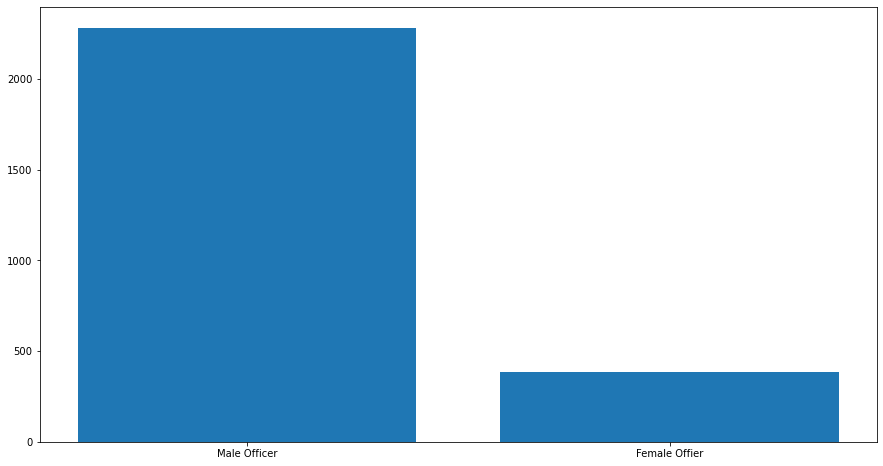

In [228]:

data = oh_sex
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.show()

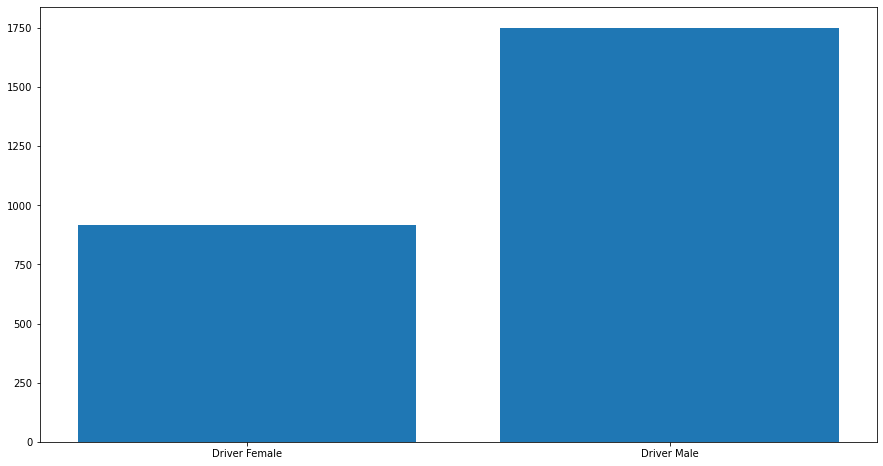

In [229]:
data = d_gender
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.show()

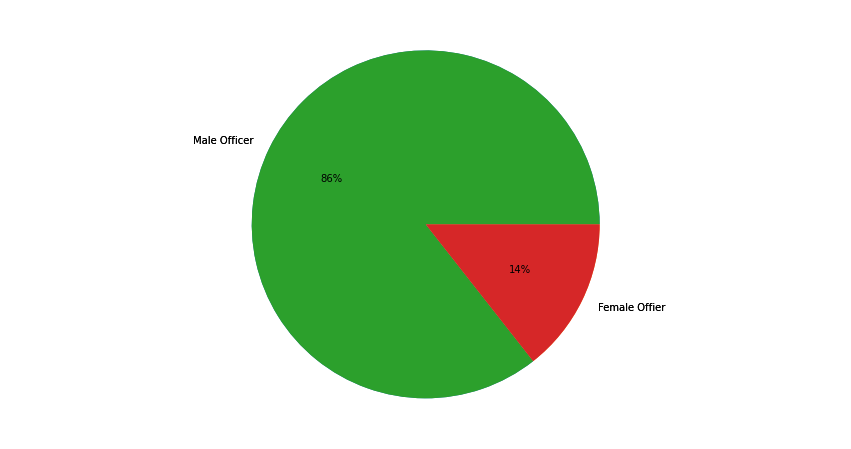

In [230]:
# Data to plot
labels = []
sizes = []

for x, y in oh_sex.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.pie(sizes, labels=labels, autopct='%1.0f%%')
plt.show()

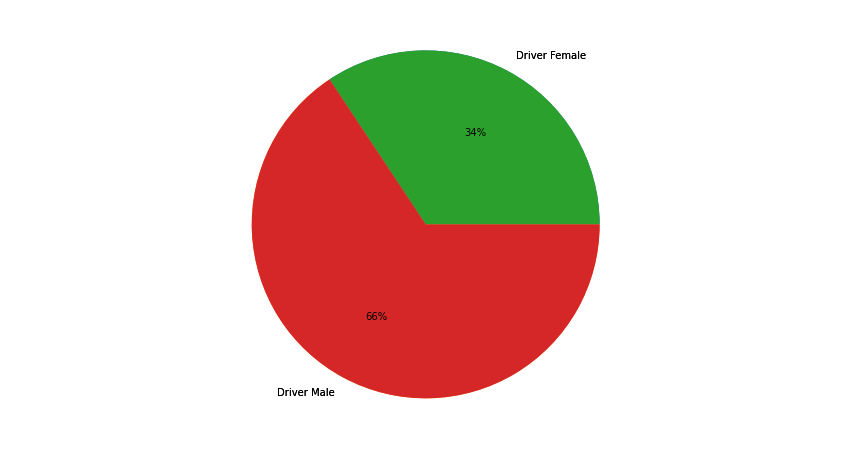

In [231]:
# Data to plot
labels = []
sizes = []

for x, y in d_gender.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.pie(sizes, labels=labels, autopct='%1.0f%%')
plt.show()

In [232]:
oraces =  df4.groupby('o_race')['o_race'].count()
draces =  df4.groupby('d_race')['d_race'].count()
print(oraces)
print(draces)

o_race
ASIAN         13
BLACK        523
HISPANIC      27
UNKNOWN        1
WHITE       2102
Name: o_race, dtype: int64
d_race
ASIAN         13
BLACK        970
HISPANIC     166
WHITE       1492
Name: d_race, dtype: int64


In [233]:
# ww =  df4.groupby('o_race')['d_race' == 'o_race'].count()

In [234]:
df5 = df4.groupby(["o_race"])["d_race"].value_counts()

print(df5)

o_race    d_race  
ASIAN     BLACK          6
          WHITE          6
          HISPANIC       1
BLACK     WHITE        279
          BLACK        192
          HISPANIC      34
          ASIAN          2
HISPANIC  WHITE         18
          BLACK          6
          HISPANIC       3
UNKNOWN   BLACK          1
WHITE     WHITE       1189
          BLACK        765
          HISPANIC     128
          ASIAN         11
Name: d_race, dtype: int64


In [235]:
df7 = df4.groupby(["stop"])["d_race"].value_counts()
print(df7)

stop                          d_race  
COMPLAINT/CRIMINAL VIOLATION  WHITE         46
                              BLACK         34
                              HISPANIC       6
COMPLIANCE STOP (KVE ONLY)    BLACK         10
                              WHITE          3
TRAFFIC VIOLATION             WHITE       1443
                              BLACK        926
                              HISPANIC     160
                              ASIAN         13
Name: d_race, dtype: int64


In [236]:
df4.groupby(["o_race"])["d_race"].agg('count')


o_race
ASIAN         13
BLACK        507
HISPANIC      27
UNKNOWN        1
WHITE       2093
Name: d_race, dtype: int64

In [237]:
print(13+507+27+1+2104)

# White oficer data 

w=(2104/2652)
a=(13/2652)
b=(507/2652)
h=(27/2652)

w = w*100
a = a*100
b = b*100
h = h*100
print(6+6+1+279+192+34+2+18+6+3+1+1189+765+128+11)

# Asain officer data 

aw = (6/2641)
aa = (0/2641)
ab = (6/2641)
ah = (1/2641)

aw = aw*100
aa = aa*100
ab = ab*100
ah = ah*100

# black officer data 

bw = (279/2641)
ba = (2/2641)
bb = (192/2641)
bh = (34/2641)

bw = bw*100
ba = ba*100
bb = bb*100
bh = bh*100

# Hispanic officer data 

hw = (18/2641)
ha = (0/2641)
hb = (6/2641)
hh = (3/2641)

hw = hw*100
ha = ha*100
hb = hb*100
hh = hh*100


# White officer data 

ww = (1189/2641)
wa = (11/2641)
wb = (765/2641)
wh = (128/2641)

ww = ww*100
wa = wa*100
wb = wb*100
wh = wh*100

# Police total citations

print(1492+13+970+166+0)

tw = (1492/2641)
ta = (13/2641)
tb = (970/2641)
th = (166/2641)

tw = tw*100
ta = ta*100
tb = tb*100
th = th*100


data = { 'Race' : ['White', 'Asain', 'Black', 'Hispanic'],
'Officer Race %' : [w, a, b, h],
'Asain Office Citation %' : [aw, aa, ab, ah], 
'Black Officer Citation %' : [bw, ba, bb, bh],
'Hispanic Officer Citation %' : [hw, ha, hb, hh],
'White Officer Citation %' : [ww, wa, wb, wh],
'Louisville population %' : [62.9, 1.4, 33, 1.9],
'Total Citation by race %' : [tw, ta, tb, th]}
  
# Create the pandas DataFrame with column name is provided explicitly
df99 = pd.DataFrame(data)
# print dataframe.
df99


2652
2641
2641


,Race,Officer Race %,Asain Office Citation %,Black Officer Citation %,Hispanic Officer Citation %,White Officer Citation %,Louisville population %,Total Citation by race %
0,White,79.336350,0.227187,10.564180,0.681560,45.020825,62.9,56.493752
1,Asain,0.490196,0.000000,0.075729,0.000000,0.416509,1.4,0.492238
2,Black,19.117647,0.227187,7.269973,0.227187,28.966301,33.0,36.728512
3,Hispanic,1.018100,0.037864,1.287391,0.113593,4.846649,1.9,6.285498


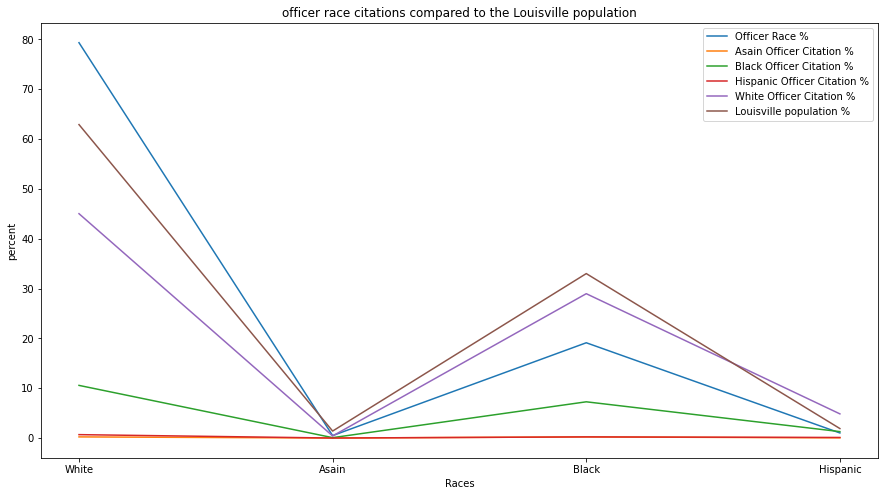

In [238]:
# x axis values 
x = ['White', 'Asain', 'Black', 'Hispanic'] 

# corresponding y axis values 
ys = {
    'Officer Race %' : [w, a, b, h],
    'Asain Officer Citation %' : [aw, aa, ab, ah], 
    'Black Officer Citation %' : [bw, ba, bb, bh],
    'Hispanic Officer Citation %' : [hw, ha, hb, hh],
    'White Officer Citation %' : [ww, wa, wb, wh],
    'Louisville population %' : [62.9, 1.4, 33, 1.9]
} 
 

for y in ys:
  plt.plot(x, ys[y], label=y)
  # print('For Month: ', y, "   Values: ", ys[y])

plt.legend()

    
# naming the x axis 
plt.xlabel('Races')

# naming the y axis 
plt.ylabel('percent') 
   
# giving a title to my graph 
plt.title('officer race citations compared to the Louisville population') 
    
# function to show the plot 
plt.show() 

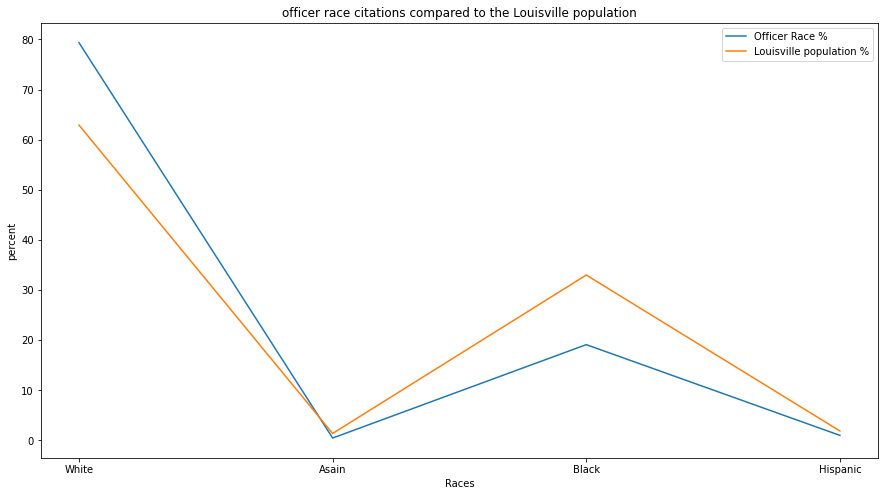

In [239]:
# x axis values 
x = ['White', 'Asain', 'Black', 'Hispanic'] 

# corresponding y axis values 
ys = {
    'Officer Race %' : [w, a, b, h],
    'Louisville population %' : [62.9, 1.4, 33, 1.9]
} 
 

for y in ys:
  plt.plot(x, ys[y], label=y)
  # print('For Month: ', y, "   Values: ", ys[y])

plt.legend()

    
# naming the x axis 
plt.xlabel('Races')

# naming the y axis 
plt.ylabel('percent') 
   
# giving a title to my graph 
plt.title('officer race citations compared to the Louisville population') 
    
# function to show the plot 
plt.show() 

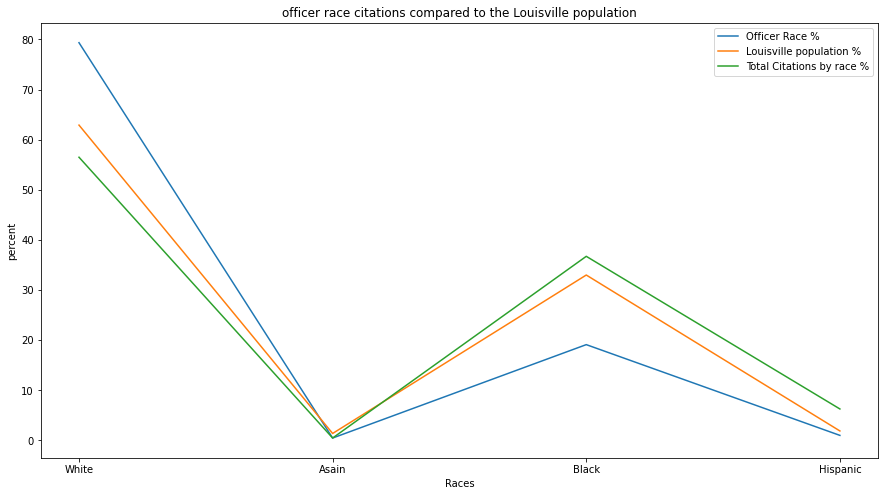

In [240]:
# x axis values 
x = ['White', 'Asain', 'Black', 'Hispanic'] 

# corresponding y axis values 
ys = {
    'Officer Race %' : [w, a, b, h],
    'Louisville population %' : [62.9, 1.4, 33, 1.9],
    'Total Citations by race %' : [tw, ta, tb, th]
} 
 

for y in ys:
  plt.plot(x, ys[y], label=y)
  # print('For Month: ', y, "   Values: ", ys[y])

plt.legend()

    
# naming the x axis 
plt.xlabel('Races')

# naming the y axis 
plt.ylabel('percent') 
   
# giving a title to my graph 
plt.title('officer race citations compared to the Louisville population') 
    
# function to show the plot 
plt.show() 

In [241]:
# sub White oficer data 

tw=(2104/2652)
ta=(13/2652)
tb=(507/2652)
th=(27/2652)

tw = tw*100
ta = ta*100
tb = tb*100
th = th*100
# print(6+6+1+279+192+34+2+18+6+3+1+1189+765+128+11)

# Asain officer data 

taw = (6/13)
taa = (0/13)
tab = (6/13)
tah = (1/13)

taw = taw*100
taa = taa*100
tab = tab*100
tah = tah*100

# black officer data 

tbw = (279/507)
tba = (2/507)
tbb = (192/507)
tbh = (34/507)

tbw = tbw*100
tba = tba*100
tbb = tbb*100
tbh = tbh*100

# Hispanic officer data 

thw = (18/27)
tha = (0/27)
thb = (6/27)
thh = (3/27)

thw = thw*100
tha = tha*100
thb = thb*100
thh = thh*100


# White officer data 

tww = (1189/2093)
twa = (11/2093)
twb = (765/2093)
twh = (128/2093)

tww = tww*100
twa = twa*100
twb = twb*100
twh = twh*100

# Police total citations

# print(1492+13+970+166+0)

ttw = (1492/2641)
tta = (13/2641)
ttb = (970/2641)
tth = (166/2641)

ttw = ttw*100
tta = tta*100
ttb = ttb*100
tth = tth*100


data2 = { 'Race' : ['White', 'Asain', 'Black', 'Hispanic'],
'Officer Race %' : [tw, ta, tb, th],
'Asain Office Citation %' : [taw, taa, tab, tah], 
'Black Officer Citation %' : [tbw, tba, tbb, tbh],
'Hispanic Officer Citation %' : [thw, tha, thb, thh],
'White Officer Citation %' : [tww, twa, twb, twh],
'Louisville population %' : [62.9, 1.4, 33, 1.9],
'Total Citation by race %' : [ttw, tta, ttb, tth]}
  
# Create the pandas DataFrame with column name is provided explicitly
df98 = pd.DataFrame(data2)
# print dataframe.
df98

,Race,Officer Race %,Asain Office Citation %,Black Officer Citation %,Hispanic Officer Citation %,White Officer Citation %,Louisville population %,Total Citation by race %
0,White,79.336350,46.153846,55.029586,66.666667,56.808409,62.9,56.493752
1,Asain,0.490196,0.000000,0.394477,0.000000,0.525561,1.4,0.492238
2,Black,19.117647,46.153846,37.869822,22.222222,36.550406,33.0,36.728512
3,Hispanic,1.018100,7.692308,6.706114,11.111111,6.115624,1.9,6.285498


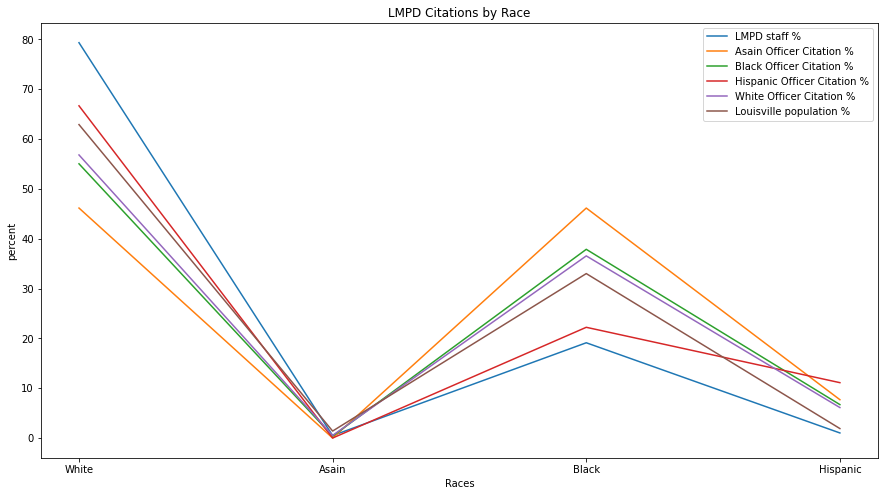

In [242]:
# x axis values 
x = ['White', 'Asain', 'Black', 'Hispanic'] 

# corresponding y axis values 
ys = {
    'LMPD staff %' : [tw, ta, tb, th],
    'Asain Officer Citation %' : [taw, taa, tab, tah], 
    'Black Officer Citation %' : [tbw, tba, tbb, tbh],
    'Hispanic Officer Citation %' : [thw, tha, thb, thh],
    'White Officer Citation %' : [tww, twa, twb, twh],
    'Louisville population %' : [62.9, 1.4, 33, 1.9]
} 
 

for y in ys:
  plt.plot(x, ys[y], label=y)
  # print('For Month: ', y, "   Values: ", ys[y])

plt.legend()

    
# naming the x axis 
plt.xlabel('Races')

# naming the y axis 
plt.ylabel('percent') 
   
# giving a title to my graph 
plt.title('LMPD Citations by Race') 

plt.rcParams["figure.figsize"] = (15,8)

# function to show the plot 
plt.show() 

In [243]:
t_sal = 103384082.76
t_cit = 2642

print('Total cost to louisville per citation:',  t_sal/t_cit)

Total cost to louisville per citation: 39130.99271763815


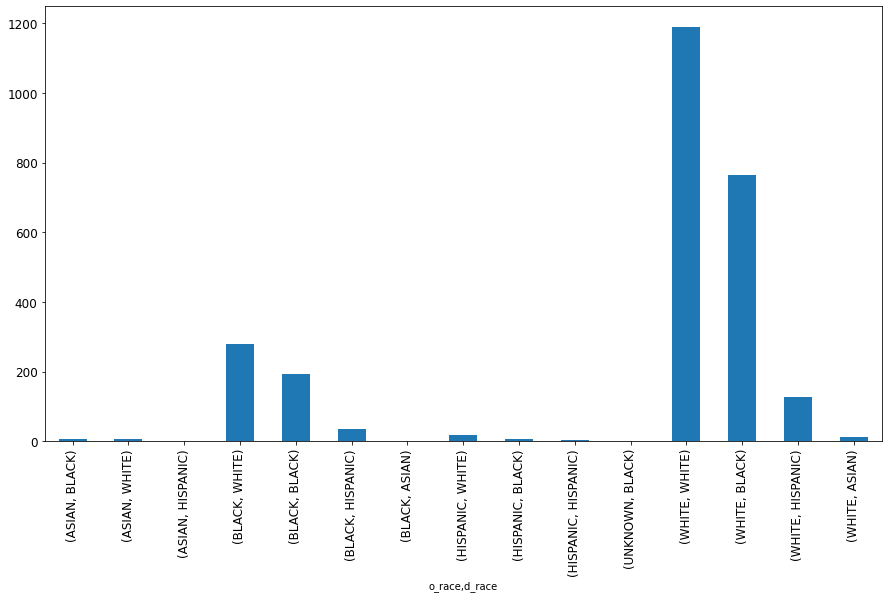

In [244]:
bargraph = df5.plot.bar(x = 'd_race', y = 'o_race', fontsize='12')

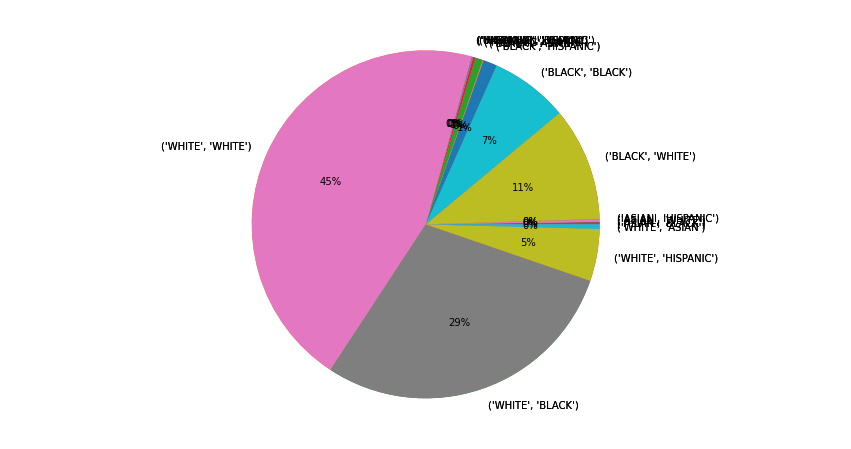

In [245]:
# Data to plot
labels = []
sizes = []

for x, y in df5.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.pie(sizes, labels=labels, autopct='%1.0f%%')
plt.show()

In [246]:
df9 = df4.groupby(["o_race"])["o_race"].value_counts()

print(df9)

o_race    o_race  
ASIAN     ASIAN         13
BLACK     BLACK        523
HISPANIC  HISPANIC      27
UNKNOWN   UNKNOWN        1
WHITE     WHITE       2102
Name: o_race, dtype: int64


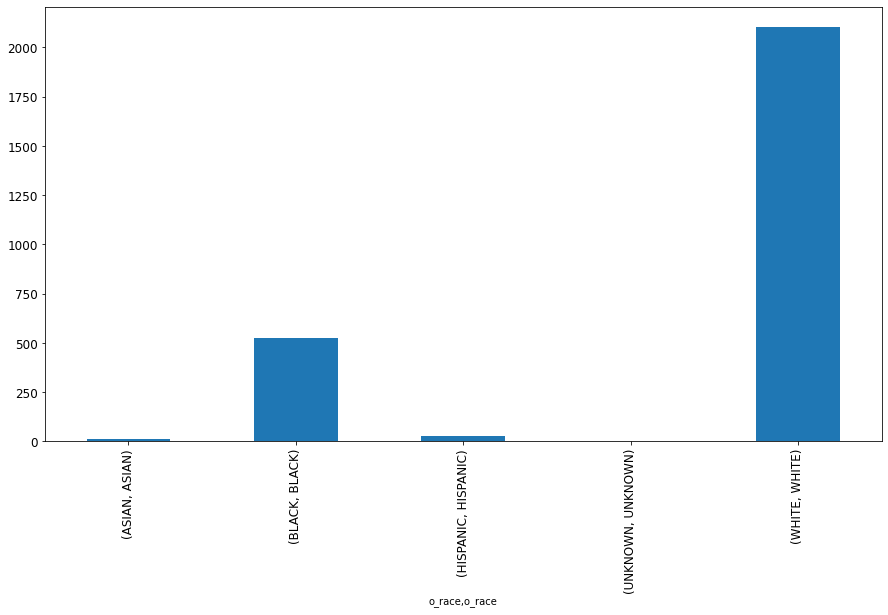

In [247]:
bargraph = df9.plot.bar(x = '', y = 'o_race', fontsize='12')


In [248]:
# url = "https://www.census.gov/quickfacts/jeffersoncountykentucky"

# with urllib.request.urlopen(url) as i:
#     html = i.read()
    
# data = pd.read_html(html)[0]
# print(data.head(30))

In [249]:
# data.to_csv("lou_pop.csv")

In [250]:
df = pd.read_csv (r'lou_pop.csv')

filename = 'lou_pop.csv'
with open('lou_pop.csv') as f:
    reader = csv.reader(f)
    header_row = next(reader)
#To display the headers to find correct vales to call min and max
print(header_row)
print("This is the total number of rows in the file:", '\n' ,len(df))

FileNotFoundError: [Errno 2] No such file or directory: 'lou_pop.csv'

In [ ]:
API = requests.get('https://www.census.gov/data/developers/data-sets/decennial-census.html')

ConnectionError: HTTPSConnectionPool(host='www.census.gov', port=443): Max retries exceeded with url: /data/developers/data-sets/decennial-census.html (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fcd90fae670>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [ ]:
data = API.text


In [ ]:
json = json.loads(data)



JSONDecodeError: Expecting value: line 2 column 1 (char 1)

In [ ]:
df6 = pd.DataFrame(json["data"])


TypeError: 'module' object is not subscriptable

In [ ]:
print(df6)

In [ ]:
df6.head()

NameError: name 'df6' is not defined